In [1]:
from progpy.models import BatteryElectroChemEODEOL
from progpy.models import NEW_BatteryElectroChemEODEOL

batt = BatteryElectroChemEODEOL()
batt2 = NEW_BatteryElectroChemEODEOL()

print('inputs:', batt.inputs)
print('outputs:', batt.outputs)
print('event(s): ', batt.events)
print('states:', batt.states)
print('params:', batt.parameters)

print('\n\ninputs:', batt2.inputs)
print('outputs:', batt2.outputs)
print('event(s): ', batt2.events)
print('states:', batt2.states)
print('params:', batt2.parameters)

inputs: ['i']
outputs: ['t', 'v']
event(s):  ['EOD', 'InsufficientCapacity']
states: ['tb', 'Vo', 'Vsn', 'Vsp', 'qnB', 'qnS', 'qpB', 'qpS', 'qMax', 'Ro', 'D']
params: {'process_noise': {'tb': np.float64(0.0), 'Vo': np.float64(0.0), 'Vsn': np.float64(0.0), 'Vsp': np.float64(0.0), 'qnB': np.float64(0.0), 'qnS': np.float64(0.0), 'qpB': np.float64(0.0), 'qpS': np.float64(0.0), 'qMax': np.float64(0.0), 'Ro': np.float64(0.0), 'D': np.float64(0.0)}, 'measurement_noise': {'t': np.float64(0.0), 'v': np.float64(0.0)}, 'qMobile': 7600, 'xnMax': 0.6, 'xnMin': 0.0, 'xpMax': 1.0, 'xpMin': 0.4, 'Ro': 0.117215, 'alpha': 0.5, 'Sn': 0.000437545, 'Sp': 0.00030962, 'kn': 2120.96, 'kp': 248898, 'Vol': 2e-05, 'VolSFraction': 0.1, 'tDiffusion': 7000000.0, 'to': 6.08671, 'tsn': 1001.38, 'tsp': 46.4311, 'U0p': 4.03, 'Ap': [-31593.7, 0.106747, 24606.4, -78561.9, 13317.9, 307387, 84916.1, -1074690.0, 2285.04, 990894, 283920, -161513, -469218], 'U0n': 0.01, 'An': [86.19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'x0':

/Users/mly1/Documents/progpy/src/progpy/models/battery_electrochem.py:675: UserWarning: Ro, qMobile, and tDiffusion will be overwritten within the model as part of battery aging modeling. Use BatteryElectroChemEOD to remove this behavior.
  warnings.warn("Ro, qMobile, and tDiffusion will be overwritten within the model as part of battery aging modeling. Use BatteryElectroChemEOD to remove this behavior.")


In [2]:
config = {
    'save_freq': 1000,
    'dt': 2,
    'events': 'InsufficientCapacity',
    'print': True
}

config2 = {
    'save_freq': 1000,
    'dt': 2,
    'events': 'InsufficientCapacity',
    'print': False
}

def future_loading(t, x=None):
    load = 1
    
    if x is not None:
        event_state = batt.event_state(x)
        if event_state["EOD"] > 0.95:
            load = 1 # Discharge
        elif event_state["EOD"] < 0.05:
            load = -1 # Charge
            
    return batt.InputContainer({'i': load})

def future_loading2(t, x=None):
    load = 1
    
    if x is not None:
        event_state = batt2.event_state(x)
        if event_state["EOD"] > 0.95:
            load = 1 # Discharge
        elif event_state["EOD"] < 0.05:
            load = -1 # Charge
            
    return batt2.InputContainer({'i': load})

In [3]:
# simulated_results = batt.simulate_to_threshold(future_loading, **config)

In [4]:
simulated_results2 = batt2.simulate_to_threshold(future_loading2, **config2)

In [5]:
# simulated_results.event_states

In [6]:
simulated_results2.event_states

LazySimResult([{'EOD': np.float64(1.0),
                'InsufficientCapacity': np.float64(1.0)},
               {'EOD': np.float64(0.8695629260529049),
                'InsufficientCapacity': np.float64(0.9956140350876236)},
               {'EOD': np.float64(0.7387843303843542),
                'InsufficientCapacity': np.float64(0.9912280701752472)},
               {'EOD': np.float64(0.6076602175423444),
                'InsufficientCapacity': np.float64(0.9868421052628706)},
               {'EOD': np.float64(0.47618921643063955),
                'InsufficientCapacity': np.float64(0.9824561403504942)},
               {'EOD': np.float64(0.3443699486888759),
                'InsufficientCapacity': np.float64(0.9780701754381178)},
               {'EOD': np.float64(0.21220102864447446),
                'InsufficientCapacity': np.float64(0.9736842105257414)},
               {'EOD': np.float64(0.07968106326407566),
                'InsufficientCapacity': np.float64(0.969298245613365)},
    

In [7]:
# fig = simulated_results.event_states.plot(xlabel='time (s)', ylabel='event states', labels={'EOD', 'InsufficientCapacity'})

/Users/mly1/Documents/progpy/src/progpy/exceptions.py:20: UserWarning: Behavior of SimResult.plot() will change with version 1.6. New behavior will match that of a pandas data frame.
  warn(msg, *args, **kwargs)


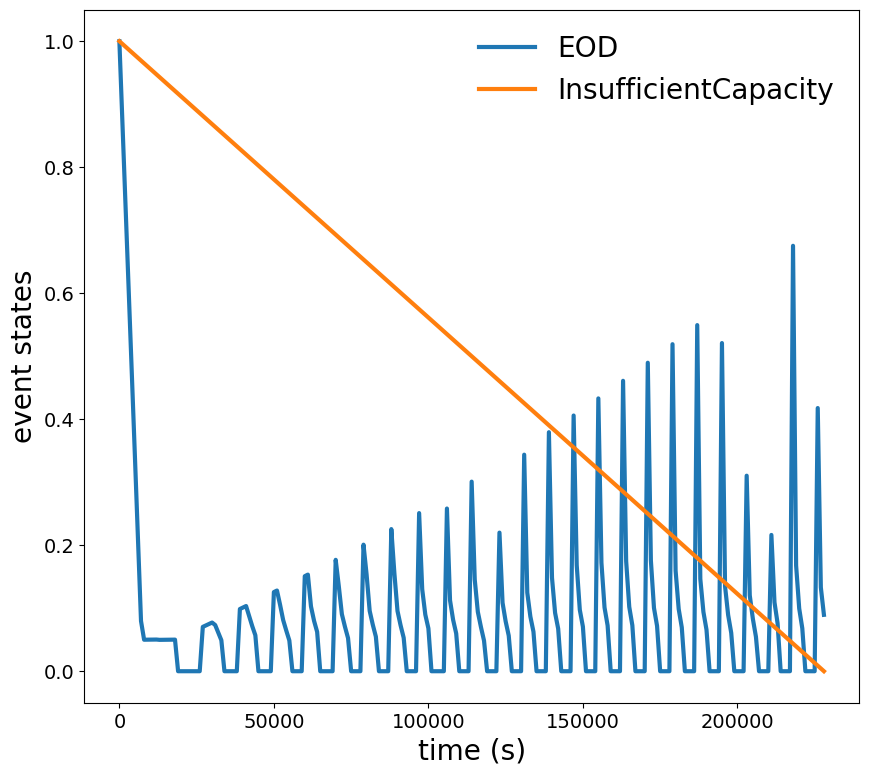

In [8]:
fig = simulated_results2.event_states.plot(xlabel='time (s)', ylabel='event states', labels={'EOD', 'InsufficientCapacity'})